# COVID-19 Deaths in Major States - Visualization with Steps

https://data.cdc.gov/NCHS/Provisional-COVID-19-Death-Counts-by-Week-Ending-D/r8kw-7aab

## Import Dataset

In [1]:
import numpy as np
import pandas as pd
dataset = pd.read_csv('Death_Counts.csv')
print(dataset.info())
dataset.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1350 entries, 0 to 1349
Data columns (total 14 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Data as of                                1350 non-null   object 
 1   Start week                                1350 non-null   object 
 2   End Week                                  1350 non-null   object 
 3   Group                                     1350 non-null   object 
 4   State                                     1350 non-null   object 
 5   Indicator                                 1350 non-null   object 
 6   COVID-19 Deaths                           1120 non-null   float64
 7   Total Deaths                              1341 non-null   float64
 8   Percent of Expected Deaths                1350 non-null   float64
 9   Pneumonia Deaths                          1206 non-null   float64
 10  Pneumonia and COVID-19 Deaths       

,Data as of,Start week,End Week,Group,State,Indicator,COVID-19 Deaths,Total Deaths,Percent of Expected Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Footnote
0,07/20/2020,02/01/2020,02/01/2020,By week,United States,Week-ending,0.0,58354.0,0.98,3778.0,0.0,479.0,4257.0,NaN
1,07/20/2020,02/08/2020,02/08/2020,By week,United States,Week-ending,1.0,59110.0,0.99,3781.0,0.0,519.0,4301.0,NaN
2,07/20/2020,02/15/2020,02/15/2020,By week,United States,Week-ending,0.0,58398.0,0.99,3808.0,0.0,554.0,4362.0,NaN
3,07/20/2020,02/22/2020,02/22/2020,By week,United States,Week-ending,5.0,58424.0,1.01,3666.0,1.0,562.0,4232.0,NaN
4,07/20/2020,02/29/2020,02/29/2020,By week,United States,Week-ending,6.0,58579.0,1.02,3779.0,3.0,644.0,4426.0,NaN


In [2]:
dataset.tail()

,Data as of,Start week,End Week,Group,State,Indicator,COVID-19 Deaths,Total Deaths,Percent of Expected Deaths,Pneumonia Deaths,Pneumonia and COVID-19 Deaths,Influenza Deaths,"Pneumonia, Influenza, or COVID-19 Deaths",Footnote
1345,07/20/2020,06/20/2020,06/20/2020,By week,Puerto Rico,Week-ending,NaN,373.0,0.68,33.0,NaN,0.0,35.0,One or more data cells have counts between 1–9...
1346,07/20/2020,06/27/2020,06/27/2020,By week,Puerto Rico,Week-ending,NaN,303.0,0.54,23.0,0.0,0.0,25.0,One or more data cells have counts between 1–9...
1347,07/20/2020,07/04/2020,07/04/2020,By week,Puerto Rico,Week-ending,NaN,123.0,0.22,10.0,NaN,0.0,12.0,One or more data cells have counts between 1–9...
1348,07/20/2020,07/11/2020,07/11/2020,By week,Puerto Rico,Week-ending,NaN,65.0,0.12,15.0,NaN,0.0,18.0,One or more data cells have counts between 1–9...
1349,07/20/2020,07/18/2020,07/18/2020,By week,Puerto Rico,Week-ending,NaN,NaN,0.01,NaN,NaN,0.0,NaN,One or more data cells have counts between 1–9...


## Convert Date to Date Objects

In [3]:
dataset['Start week'] =  pd.to_datetime(dataset['Start week'], format='%m/%d/%Y')

## Select Subset of Data

In [4]:
dataset = pd.DataFrame(dataset.loc[(dataset['State'] == 'California') 
                                   | (dataset['State'] == 'Florida')
                                  | (dataset['State'] == 'New York')
                                  | (dataset['State'] == 'Texas')])
dataset = dataset.pivot(index = 'Start week', columns = 'State', values = 'COVID-19 Deaths')
print(dataset)

State       California  Florida  New York  Texas
Start week                                      
2020-02-01         0.0      0.0       0.0    0.0
2020-02-08         NaN      0.0       0.0    0.0
2020-02-15         0.0      0.0       0.0    0.0
2020-02-22         NaN      0.0       NaN    0.0
2020-02-29         0.0      0.0       0.0    0.0
2020-03-07         NaN      NaN       0.0    NaN
2020-03-14         NaN      NaN       NaN    0.0
2020-03-21        44.0     17.0      41.0   10.0
2020-03-28       130.0     92.0     291.0   44.0
2020-04-04       289.0    217.0    1100.0  126.0
2020-04-11       380.0    301.0    1988.0  204.0
2020-04-18       533.0    309.0    1999.0  237.0
2020-04-25       527.0    321.0    1582.0  240.0
2020-05-02       540.0    306.0    1132.0  235.0
2020-05-09       547.0    289.0     874.0  225.0
2020-05-16       495.0    257.0     666.0  247.0
2020-05-23       480.0    231.0     445.0  168.0
2020-05-30       449.0    227.0     327.0  206.0
2020-06-06       432

### Interpolate to Smoothen Graph Lines

In [5]:
dataset['California'].interpolate(method='linear', inplace=True, limit_direction="both")
dataset['Florida'].interpolate(method='linear', inplace=True, limit_direction="both")
dataset['New York'].interpolate(method='linear', inplace=True, limit_direction="both")
print(dataset)

State       California     Florida  New York  Texas
Start week                                         
2020-02-01    0.000000    0.000000       0.0    0.0
2020-02-08    0.000000    0.000000       0.0    0.0
2020-02-15    0.000000    0.000000       0.0    0.0
2020-02-22    0.000000    0.000000       0.0    0.0
2020-02-29    0.000000    0.000000       0.0    0.0
2020-03-07   14.666667    5.666667       0.0    NaN
2020-03-14   29.333333   11.333333      20.5    0.0
2020-03-21   44.000000   17.000000      41.0   10.0
2020-03-28  130.000000   92.000000     291.0   44.0
2020-04-04  289.000000  217.000000    1100.0  126.0
2020-04-11  380.000000  301.000000    1988.0  204.0
2020-04-18  533.000000  309.000000    1999.0  237.0
2020-04-25  527.000000  321.000000    1582.0  240.0
2020-05-02  540.000000  306.000000    1132.0  235.0
2020-05-09  547.000000  289.000000     874.0  225.0
2020-05-16  495.000000  257.000000     666.0  247.0
2020-05-23  480.000000  231.000000     445.0  168.0
2020-05-30  

# Styling Graph

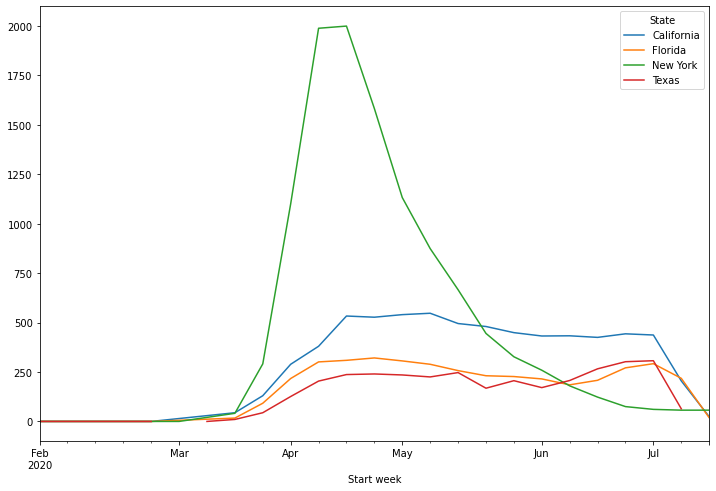

In [6]:
ax = dataset.plot(figsize = (12,8))

In [7]:
import matplotlib as mpl
mpl.style.available

['Solarize_Light2',
 '_classic_test_patch',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

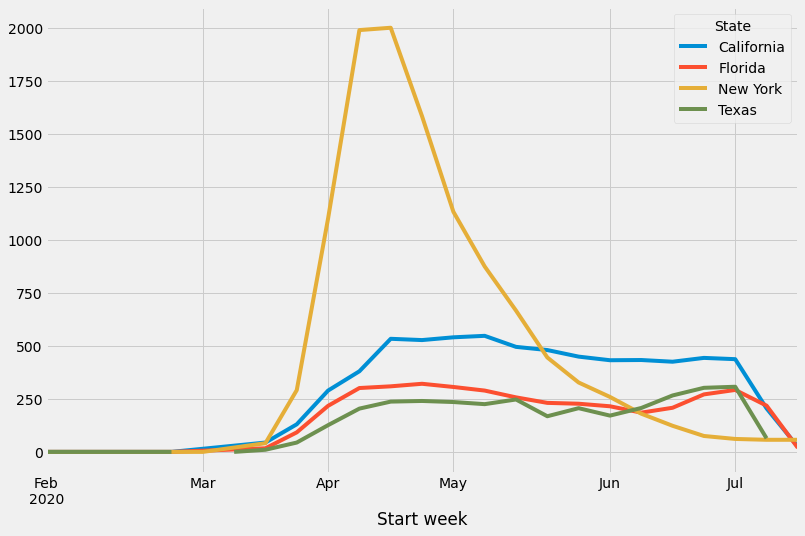

In [8]:
mpl.style.use('fivethirtyeight')
ax = dataset.plot(figsize = (12,8))

## Customize Tick Labels

Using the ```plot()``` method:  
```x``` has the column of values to use in x-axis (major),  
```y``` has the columns to use for the y-axis,  
```figsize``` sets ```(width, height)``` in inches,  
```color``` sets line colors,  
```legend``` toggles legend

Using the ```tick_params()``` method:  
```axis``` which axis has labels to modify,  
```which``` major or minor tick labels,  
```labelsize``` font size

### Change Tick Font Size

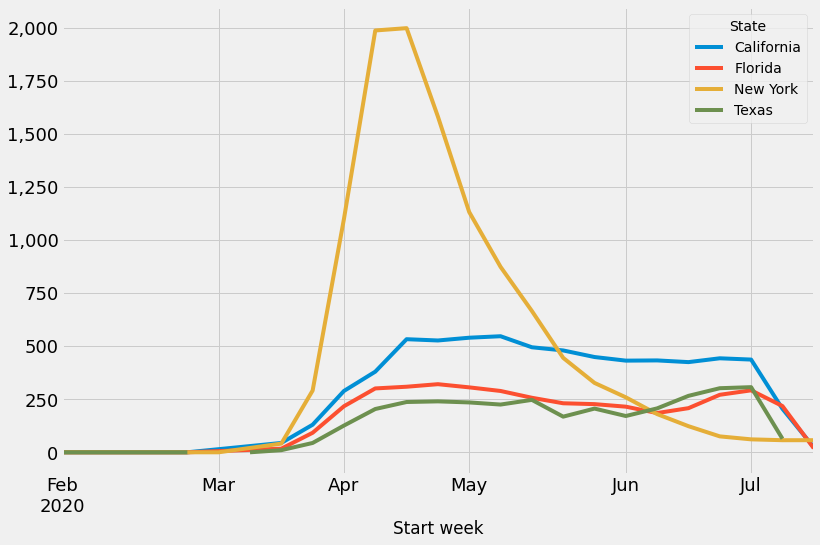

In [9]:
ax = dataset.plot(figsize = (12,8))
ax.tick_params(axis = 'both', which = 'major', labelsize = 18)
# Add comma format
ax.get_yaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

### Change Tick Names

[Text(0, 0, 'Feb'),
 Text(0, 0, 'Mar'),
 Text(0, 0, 'Apr'),
 Text(0, 0, 'May'),
 Text(0, 0, 'Jun'),
 Text(0, 0, 'Jul')]

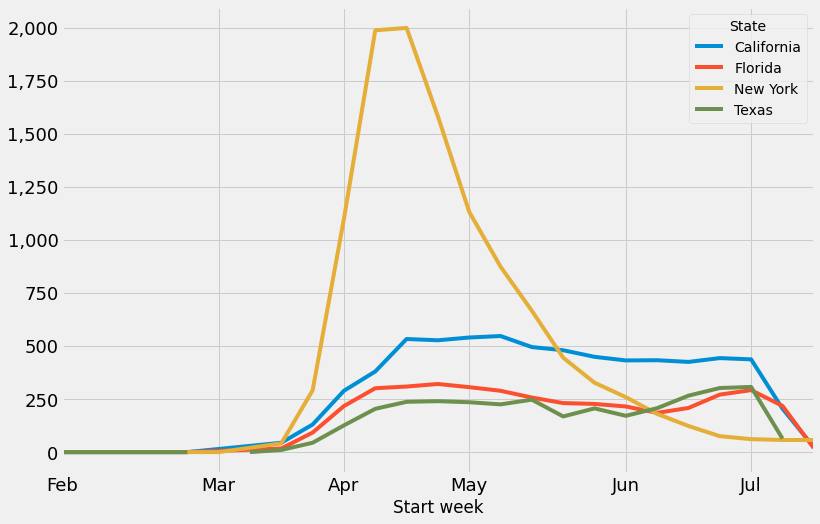

In [10]:
# The previous code
ax = dataset.plot(figsize = (12,8))
ax.tick_params(axis = 'both', which = 'major', labelsize = 18)
ax.get_yaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

# Define tick label names
ax.set_xticklabels(labels = ['Feb','Mar','Apr','May','Jun','Jul'])

## Customize Grid Lines

### Thicken X-Axis

Thicken y-axis line with ```axhline()``` method:  
```y``` y-coordinate of line to change,  
```color``` line color,  
```linewidth``` width of line,  
```alpha``` opacity between 0 and 1

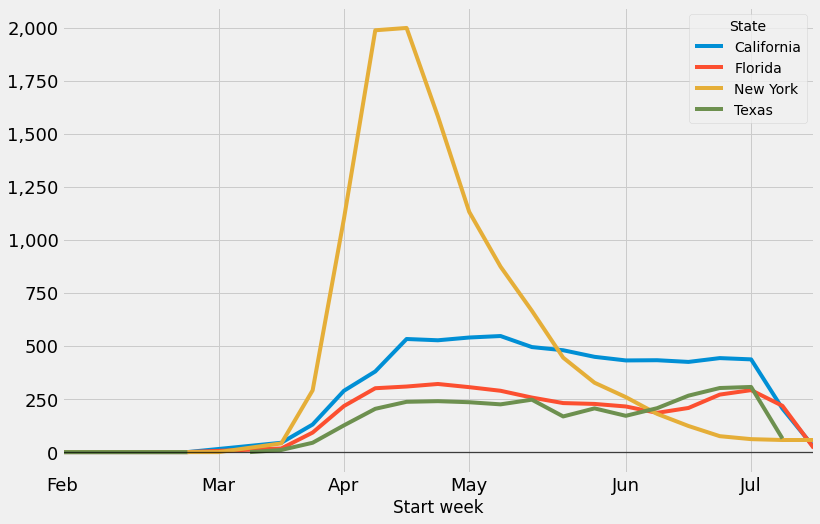

In [11]:
# The previous code
ax = dataset.plot(figsize = (12,8))
ax.tick_params(axis = 'both', which = 'major', labelsize = 18)
ax.get_yaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_xticklabels(labels = ['Feb','Mar','Apr','May','Jun','Jul'])

# Generate a bolded horizontal line at y = 0
ax.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

## Colorblind Colors

```text()``` method:  
```x``` and ```y``` specify coordinates for text placement,  
```s``` is the string of text,  
```fonstize``` size of font,  
```color``` text color in hexadecimal format,  
```rotation``` rotation value for text
```backgroundcolor``` sets background of text  

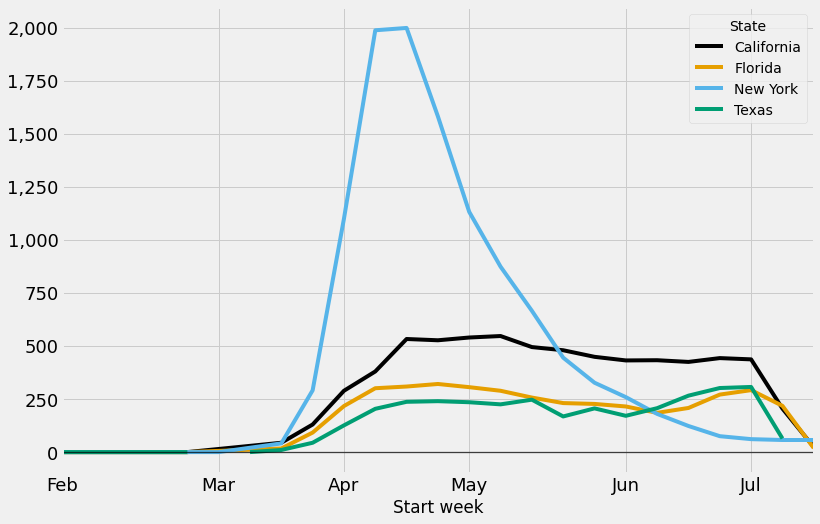

In [12]:
# Colorblind-friendly colors
colors = [[0,0,0], [230/255,159/255,0], [86/255,180/255,233/255], [0,158/255,115/255],
          [213/255,94/255,0], [0,114/255,178/255]]

# The previous code we modify
ax = dataset.plot(figsize = (12,8), color = colors)

# The previous code that remains the same
ax.tick_params(axis = 'both', which = 'major', labelsize = 18)
ax.get_yaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_xticklabels(labels = ['Feb','Mar','Apr','May','Jun','Jul'])
ax.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

### Define Function for Placing Elements Relative to Origin

In [13]:
def perc_pos(ax0, rng, ratio):
    return (ax0 + (ratio * rng))

## Signature Bar

Apply ```set_visible()``` method to ```fte_graph.xaxis.label``` object

```text()``` method:  
```x``` and ```y``` specify coordinates for text placement,  
```s``` is the string of text,  
```fonstize``` size of font,  
```color``` text color in hexadecimal format,  
```backgroundcolor``` sets background of text  

Text(2610.0, -512.24375, 'KATPASALO                                                                                                                              Source: https://data.cdc.gov/')

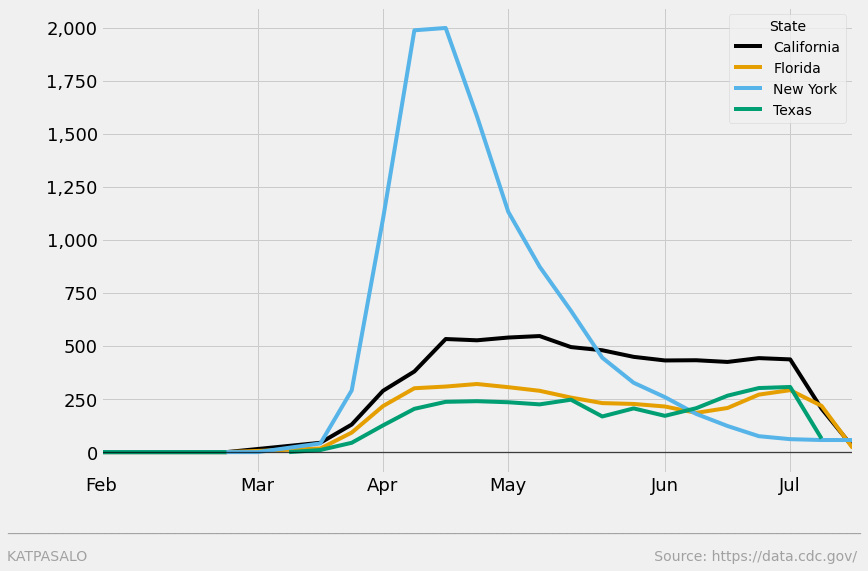

In [14]:
# The previous code
ax = dataset.plot(figsize = (12,8), color = colors)
ax.tick_params(axis = 'both', which = 'major', labelsize = 18)
ax.get_yaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_xticklabels(labels = ['Feb','Mar','Apr','May','Jun','Jul'])
ax.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

# Signature bar
ax.xaxis.label.set_visible(False)
x_range = ax.get_xlim()[1] - ax.get_xlim()[0]
y_range = ax.get_ylim()[1] - ax.get_ylim()[0]
sig_pos = [ [-1/8, -1/8], 
           [-1/8, -3/16] ]

ax.text(x = perc_pos(ax.get_xlim()[0], x_range, sig_pos[0][0]), 
        y = perc_pos(ax.get_ylim()[0], y_range, sig_pos[0][1]),
        s = '__________________________________________________________________________________________________________________________',
        color = 'grey', alpha = .7)

ax.text(x = perc_pos(ax.get_xlim()[0], x_range, sig_pos[1][0]), 
        y = perc_pos(ax.get_ylim()[0], y_range, sig_pos[1][1]),
        s = 'KATPASALO                                                                                                                              Source: https://data.cdc.gov/', 
        fontsize = 14, color = 'grey', alpha = .7)

## Line Labels

Text(2623.8, 119.93999999999998, 'Texas')

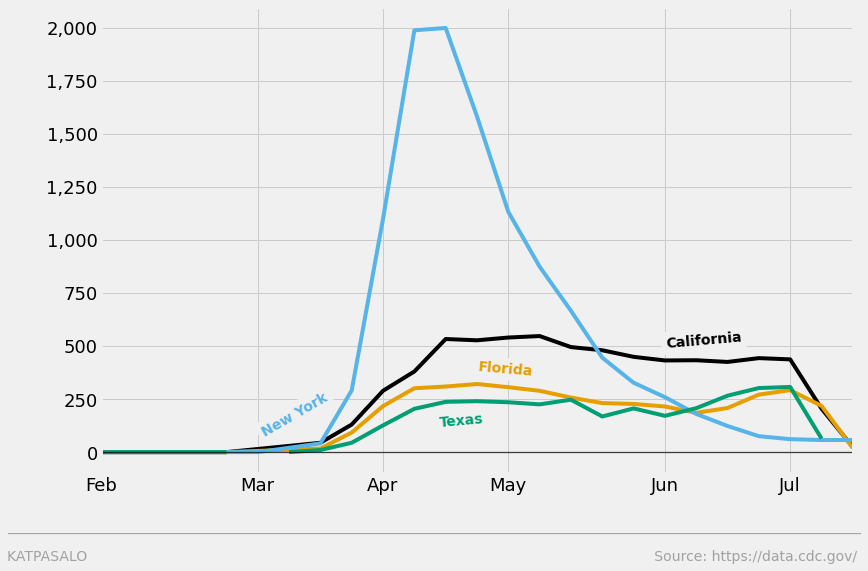

In [48]:
# Previous code changed
ax = dataset.plot(figsize = (12,8), color = colors, legend = False)

# The previous code
ax.tick_params(axis = 'both', which = 'major', labelsize = 18)
ax.get_yaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_xticklabels(labels = ['Feb','Mar','Apr','May','Jun','Jul'])
ax.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

ax.xaxis.label.set_visible(False)
x_range = ax.get_xlim()[1] - ax.get_xlim()[0]
y_range = ax.get_ylim()[1] - ax.get_ylim()[0]
sig_pos = [ [-1/8, -1/8], 
           [-1/8, -3/16] ]

ax.text(x = perc_pos(ax.get_xlim()[0], x_range, sig_pos[0][0]), 
        y = perc_pos(ax.get_ylim()[0], y_range, sig_pos[0][1]),
        s = '__________________________________________________________________________________________________________________________',
        color = 'grey', alpha = .7)

ax.text(x = perc_pos(ax.get_xlim()[0], x_range, sig_pos[1][0]), 
        y = perc_pos(ax.get_ylim()[0], y_range, sig_pos[1][1]),
        s = 'KATPASALO                                                                                                                              Source: https://data.cdc.gov/', 
        fontsize = 14, color = 'grey', alpha = .7)

# Add colored labels
label_pos = [ [.75, .27],
            [.5, .21], 
            [.21, .08], 
            [.45, .1] ]

ax.text(x = perc_pos(ax.get_xlim()[0], x_range, label_pos[0][0]), 
        y = perc_pos(ax.get_ylim()[0], y_range, label_pos[0][1]),
        s = 'California', 
        color = colors[0], weight = 'bold', rotation = 5,
        backgroundcolor = '#f0f0f0')
ax.text(x = perc_pos(ax.get_xlim()[0], x_range, label_pos[1][0]), 
        y = perc_pos(ax.get_ylim()[0], y_range, label_pos[1][1]), 
        s = 'Florida', 
        color = colors[1], weight = 'bold', rotation = -5,
        backgroundcolor = '#f0f0f0')
ax.text(x = perc_pos(ax.get_xlim()[0], x_range, label_pos[2][0]), 
        y = perc_pos(ax.get_ylim()[0], y_range, label_pos[2][1]), 
        s = 'New York', 
        color = colors[2], weight = 'bold', rotation = 30,
        backgroundcolor = '#f0f0f0')
ax.text(x = perc_pos(ax.get_xlim()[0], x_range, label_pos[3][0]), 
        y = perc_pos(ax.get_ylim()[0], y_range, label_pos[3][1]), 
        s = 'Texas', 
        color = colors[3], weight = 'bold', rotation = 5,
        backgroundcolor = '#f0f0f0')

## Title and Subtitle

```text()``` method:  
```x``` and ```y``` specify coordinates for text placement,  
```s``` is the string of text,  
```fonstize``` size of font,  
```color``` text color in hexadecimal format,  
```backgroundcolor``` sets background of text  

Text(2610.0, 2318.84, 'Despite similar shelter-in-place timelines, New York saw particularly high death counts in \ncomparison to other states due to earlier introduction to Coronavirus by European travelers.')

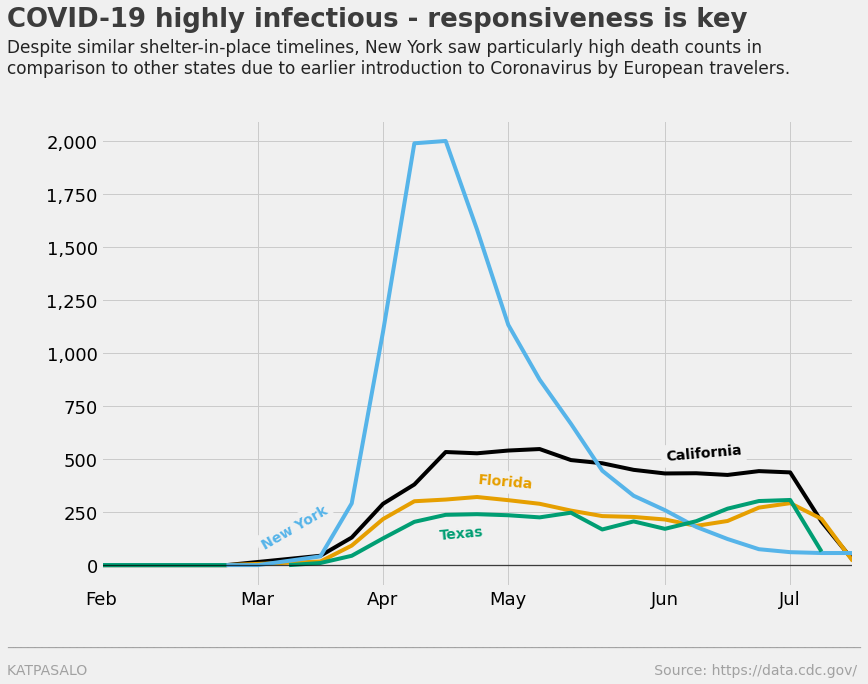

In [57]:
# The previous code
ax = dataset.plot(figsize = (12,8), color = colors, legend = False)
ax.tick_params(axis = 'both', which = 'major', labelsize = 18)
ax.get_yaxis().set_major_formatter(mpl.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_xticklabels(labels = ['Feb','Mar','Apr','May','Jun','Jul'])
ax.axhline(y = 0, color = 'black', linewidth = 1.3, alpha = .7)

ax.xaxis.label.set_visible(False)
x_range = ax.get_xlim()[1] - ax.get_xlim()[0]
y_range = ax.get_ylim()[1] - ax.get_ylim()[0]
sig_pos = [ [-1/8, -1/8], 
           [-1/8, -3/16] ]

ax.text(x = perc_pos(ax.get_xlim()[0], x_range, sig_pos[0][0]), 
        y = perc_pos(ax.get_ylim()[0], y_range, sig_pos[0][1]),
        s = '__________________________________________________________________________________________________________________________',
        color = 'grey', alpha = .7)

ax.text(x = perc_pos(ax.get_xlim()[0], x_range, sig_pos[1][0]), 
        y = perc_pos(ax.get_ylim()[0], y_range, sig_pos[1][1]),
        s = 'KATPASALO                                                                                                                              Source: https://data.cdc.gov/', 
        fontsize = 14, color = 'grey', alpha = .7)

label_pos = [ [.75, .27],
            [.5, .21], 
            [.21, .08], 
            [.45, .1] ]

ax.text(x = perc_pos(ax.get_xlim()[0], x_range, label_pos[0][0]), 
        y = perc_pos(ax.get_ylim()[0], y_range, label_pos[0][1]),
        s = 'California', 
        color = colors[0], weight = 'bold', rotation = 5,
        backgroundcolor = '#f0f0f0')
ax.text(x = perc_pos(ax.get_xlim()[0], x_range, label_pos[1][0]), 
        y = perc_pos(ax.get_ylim()[0], y_range, label_pos[1][1]), 
        s = 'Florida', 
        color = colors[1], weight = 'bold', rotation = -5,
        backgroundcolor = '#f0f0f0')
ax.text(x = perc_pos(ax.get_xlim()[0], x_range, label_pos[2][0]), 
        y = perc_pos(ax.get_ylim()[0], y_range, label_pos[2][1]), 
        s = 'New York', 
        color = colors[2], weight = 'bold', rotation = 30,
        backgroundcolor = '#f0f0f0')
ax.text(x = perc_pos(ax.get_xlim()[0], x_range, label_pos[3][0]), 
        y = perc_pos(ax.get_ylim()[0], y_range, label_pos[3][1]), 
        s = 'Texas', 
        color = colors[3], weight = 'bold', rotation = 5,
        backgroundcolor = '#f0f0f0')

# Adding a title and a subtitle
title_pos = [-1/8, 1.2]
subtitle_pos = [-1/8, 1.1]

ax.text(x = perc_pos(ax.get_xlim()[0], x_range, title_pos[0]), 
        y = perc_pos(ax.get_ylim()[0], y_range, title_pos[1]),
        s = "COVID-19 highly infectious - responsiveness is key",
        fontsize = 26, weight = 'bold', alpha = .75)
ax.text(x = perc_pos(ax.get_xlim()[0], x_range, subtitle_pos[0]), 
        y = perc_pos(ax.get_ylim()[0], y_range, subtitle_pos[1]),
        s = 'Despite similar shelter-in-place timelines, New York saw particularly high death counts in \ncomparison to other states due to earlier introduction to Coronavirus by European travelers.',
        fontsize = 17, alpha = .85)